In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from supernova import *
from models import *
os.chdir('data/')

In [8]:
os.getcwd()

'C:\\Users\\padma\\Supernovae\\SC_Modeling\\SC_Notebooks\\shock-cooling-curve\\data'

In [9]:
os.listdir()

['1993J',
 '2011dh',
 '2011fu',
 '2013df',
 '2016gkg',
 '2019dge',
 '2019hvg',
 '2020bvc',
 '2021gno',
 '2021inl',
 'filter_info.csv',
 'iPTF16hgs',
 'test.ini',
 'test.png']

In [37]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')


,0,1,2,3
row_1,3,2,1,0
row_2,a,b,c,d


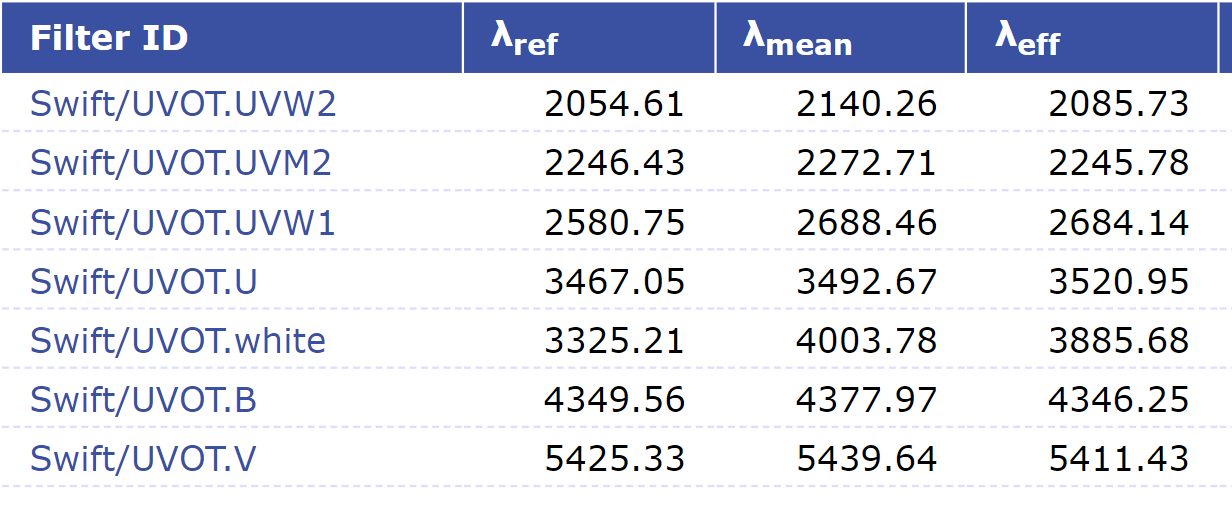

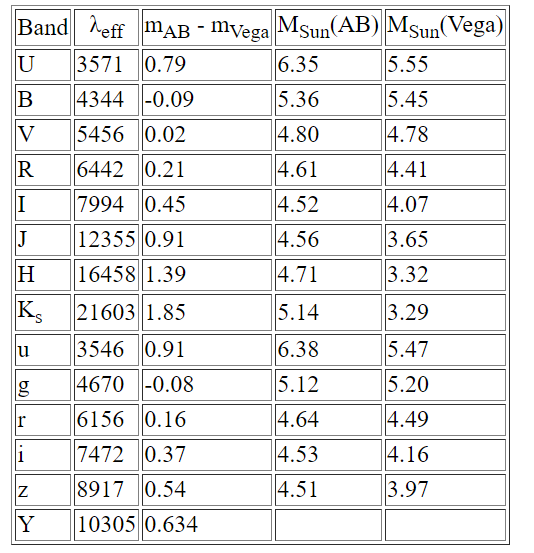

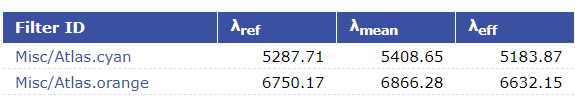

In [19]:
filter_data = {'W2':['Swift_UVOT', 2085.73, 1.73, '#C20078'], 'M2':['Swift_UVOT',2245.78, 1.69, '#00FFFF'], 
               'W1':['Swift_UVOT',2684.14, 1.51,'#380282' ], 'U':['johnson', 3571, 0.79, '#380282'], 
               'u':['sdss', 3546, 0.91, '#580F41'], 'us':['Swift_UVOT',3520.95, 1.02, '#7E1E9C'], 
               'B':['johnson',4344, -0.09, '#7BC8F6'], 'bs':['Swift_UVOT',4346.25, -0.13, '#0343DF'], 
               'g':['sdss', 4670, -0.08, '#15B01A'], 'c': ['ATLAS', 5183.87, 0, '#00FFFF'], 
               'V':['johnson',5456, 0.02, '#9A0EEA'],'vs':['Swift_UVOT',5411.43, -0.01, '#C875C4'],
               'R':['johnson', 6442, 0.21, '#E50000'], 'o':['ATLAS', 6632.15, 0, '#F97306'], 
               'r': ['sdss', 6156, 0.16, '#FF796C'], 'i':['sdss', 7472, 0.37, '#580F41'], 
               'z':['sdss', 8917, 0.54, '#000000'], 'Clear':['PanSTARRS',6439.35, 0, '#AAA662'],
               'I':['johnson', 7994, 0.45, '#01153E'], 'J':['johnson', 12355, 0.91, '#FBDD7E'], 
               'K':['johnson', 21603, 1.85, '#929591']
              }



# color_dict = {'W2': 'magenta', 'W2': 'cyan', 'W1': 'dodgerblue',  'us': 'purple','bs': 'blue','vs': 'violet',
#               'z': 'black','U': 'purple','u':'purple','b': 'blue','v': 'violet', 'r': (1,0,0), 'o': 'orange',
#               'R': (1,0,0),
#               'g': (0,1,0), 'i': 'darkorange',
#               'clear':'black'}
#2021gno: SWIFT UVOT, SDSS, array(['W2', 'M2', 'W1', 'U', 'B', 'g', 'r', 'i'], dtype=object)
#2021inl: SDSS, array(['g', 'r', 'i'], dtype=object) -- in the original paper, o, c (atlas) and z were also there

# vega_conv = {'U':0.79, 'B':-0.09,'V':0.02, 'R':0.21, 'I':0.45, 'u':0.91, 'g':-0.08, 'r':0.16,
#                   'i':0.37, 'z':0.54, 'W1':1.51, 'M2':1.69,'W2':1.73, 'us': 1.02, 'bs':-0.13, 'vs': -0.01}
# filt_to_wvl = {'W2': 2085.73, 'M2': 2245.78, 'W1': 2684.14, 'us': 3520.95, 'bs': 3520.95, 'vs': 5411.43, 'u': 3546,
#                     'b': 4350.6, 'g': 4765.1, 'c': 5183.87, 'v': 5401.4, 'r': 6223.3, 'o': 6632.15, 'i': 7609.2,
#                     'z': 8917, 'j': 12355, 'h': 16458, 'k': 21603, 'clear':6500}

In [20]:
pd.DataFrame.from_dict(filter_data, orient='index', columns=['Bandpass', 'Effective Wavelength', 'AB - Vega', 'Color']).sort_values('Effective Wavelength').to_csv('filter_info.csv')

In [128]:
data = {'index': [('a', 'b'), ('a', 'c')],
        'columns': [('x', 1), ('y', 2)],
        'data': [[1, 3], [2, 4]],
        'index_names': ['n1', 'n2'],
        'column_names': ['z1', 'z2']}
pd.DataFrame.from_dict(data, orient='tight')

z1     x  y
z2     1  2
n1 n2      
a  b   1  3
   c   2  4

In [58]:
df=pd.read_csv('filter_info.csv', index_col=0)

In [64]:
list(df.index)

['W2',
 'M2',
 'W1',
 'us',
 'u',
 'U',
 'B',
 'bs',
 'g',
 'c',
 'vs',
 'V',
 'r',
 'Clear',
 'R',
 'o',
 'i',
 'z']

In [ ]:
# W2, M2, W1, U, B, G, V, R, O, I, Clear -- order
# johnson U	B	V	R	I	J	K
# sdss u	g	r	i	z
# swift u, b, v, w2, m2, w1
# ATLAS o, c


# effective wavelength, SDSS, Johnson, vega to AB https://www.astronomy.ohio-state.edu/martini.10/usefuldata.html
# effective wavelength, SWIFT, PANSTARRS http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php
# effective wavelength, panstarrs: we used 'open' for the 'clear' filter
# vega to ab, SWIFT https://swift.gsfc.nasa.gov/analysis/uvot_digest/zeropts.html
#EF4026
#FF796C

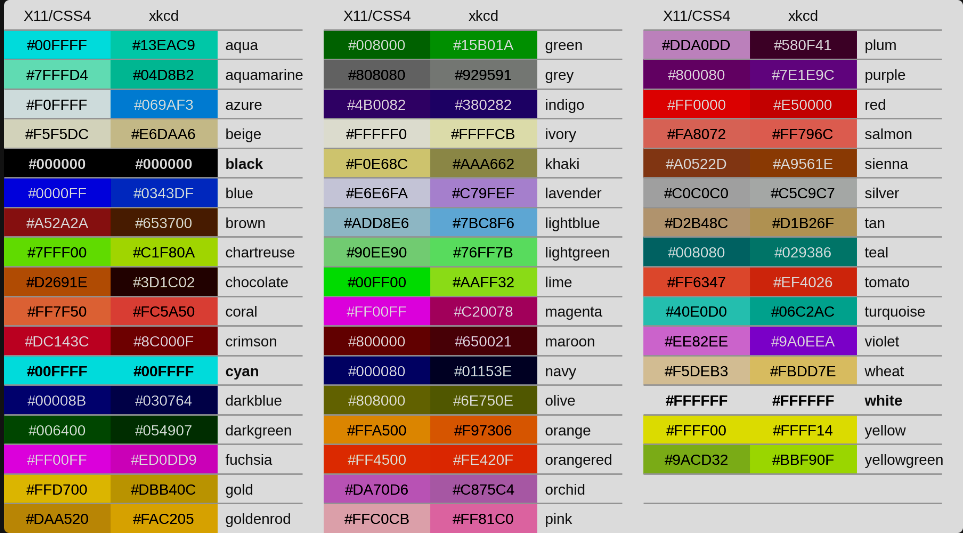

In [17]:
filt_to_wvl = {'W2': 2085.73, 'M2': 2245.78, 'W1': 2684.14, 'us': 3520.95, 'bs': 3520.95, 'vs': 5411.43, 'u': 3546,
                    'b': 4350.6, 'g': 4765.1, 'c': 5183.87, 'v': 5401.4, 'r': 6223.3, 'o': 6632.15, 'i': 7609.2,
                    'z': 8917, 'j': 12355, 'h': 16458, 'k': 21603, 'clear':6500}
vega_conv = {'U':0.79, 'B':-0.09,'V':0.02, 'R':0.21, 'I':0.45, 'u':0.91, 'g':-0.08, 'r':0.16,
                  'i':0.37, 'z':0.54, 'W1':1.51, 'M2':1.69,'W2':1.73, 'us': 1.51, 'bs':-0.13, 'vs': -0.01}

color_dict = {'W2': 'magenta', 'W2': 'cyan', 'W1': 'dodgerblue',  'us': 'purple','bs': 'blue','vs': 'violet',
              'z': 'black','U': 'purple','u':'purple','b': 'blue','v': 'violet', 'r': (1,0,0), 'o': 'orange',
              'R': (1,0,0),
              'g': (0,1,0), 'i': 'darkorange',
              'clear':'black'}

In [38]:
df_gno = pd.read_csv('Data/2021gno/sn2021gno.csv')

In [40]:
df_inl = pd.read_csv('Data/2021inl/sn2021inl_phot.csv')

In [41]:
pd.unique(df_inl['FLT'])


array(['g', 'r', 'i'], dtype=object)

In [111]:
df

,Bandpass,Effective Wavelength,AB - Vega,Color
W2,Swift_UVOT,2085.73,1.73,#C20078
M2,Swift_UVOT,2245.78,1.69,#00FFFF
W1,Swift_UVOT,2684.14,1.51,#380282
us,Swift_UVOT,3520.95,1.02,#7E1E9C
u,sdss,3546.00,0.91,#580F41
U,johnson,3571.00,0.79,#380282
B,johnson,4344.00,-0.09,#7BC8F6
bs,Swift_UVOT,4346.25,-0.13,#0343DF
g,sdss,4670.00,-0.08,#15B01A
c,ATLAS,5183.87,0.00,#00FFFF


In [106]:
df_gkg = pd.read_csv('Data/2016gkg/sn2016gkg_phot.csv')


In [113]:
def convertAB_Vega(flt, mag, vega):
    if vega:
        mag += df.loc[flt]['AB - Vega']
        return mag
    return mag

In [114]:
df_gkg

,MJD,MAG,MAGERR,FLT,Vega
0,57651.665,17.360,0.000,vs,1
1,57651.748,17.600,0.500,Clear,0
2,57652.040,15.940,0.130,o,0
3,57652.050,15.780,0.080,o,0
4,57652.640,14.500,0.200,Clear,0
...,...,...,...,...,...
239,57657.591,16.264,0.011,i,0
240,57657.591,16.089,0.012,r,0
241,57657.592,16.089,0.018,r,0
242,57657.593,16.237,0.022,i,0


In [115]:
# df['newcolumn'] = df.apply(lambda x: fxy(x['A'], x['B']), axis=1)
df_gkg['MAG'] = df_gkg.apply(lambda x: convertAB_Vega(x['FLT'], x['MAG'], x['Vega']), axis=1)

In [116]:
df_gkg

,MJD,MAG,MAGERR,FLT,Vega
0,57651.665,17.350,0.000,vs,1
1,57651.748,17.600,0.500,Clear,0
2,57652.040,15.940,0.130,o,0
3,57652.050,15.780,0.080,o,0
4,57652.640,14.500,0.200,Clear,0
...,...,...,...,...,...
239,57657.591,16.264,0.011,i,0
240,57657.591,16.089,0.012,r,0
241,57657.592,16.089,0.018,r,0
242,57657.593,16.237,0.022,i,0


In [95]:
np.array(df_gkg[df_gkg['Vega']==1]['MAG'])

array([17.36 , 15.01 , 15.01 , 13.745, 13.956, 15.183, 15.127, 13.865,
       14.031, 15.257, 15.295, 13.691, 13.964, 14.147, 15.315, 14.847,
       14.497, 15.444, 15.44 , 14.891, 14.789, 15.7  , 15.7  , 15.54 ,
       15.54 , 15.022, 14.91 , 15.046, 14.819, 15.183, 15.245, 14.94 ,
       15.73 , 15.73 , 15.611, 15.459, 15.585, 15.104, 15.655, 15.167,
       16.01 , 16.01 , 15.84 , 15.84 , 15.759, 15.338, 16.33 , 15.99 ,
       16.04 , 16.404, 16.443, 16.093, 16.287, 16.629, 16.574, 16.361,
       16.382, 16.735, 16.714, 16.397, 16.422, 16.702, 16.723, 16.733,
       16.712, 16.453, 16.461, 16.836, 16.867, 16.546, 16.525, 16.876,
       16.938, 16.62 , 16.627, 17.003, 16.573, 16.683, 17.105, 17.123,
       16.709, 16.661, 17.043, 17.097, 16.657, 16.628, 17.02 , 16.858,
       16.494, 16.602, 17.008, 17.039, 16.449, 16.468, 16.92 , 16.944,
       16.479, 16.523, 16.94 , 17.02 , 16.535, 16.562, 16.712, 16.739,
       16.287, 16.272, 16.787, 16.64 , 16.219, 16.262, 16.303, 16.629,
      

In [89]:
np.array(df_gkg[df_gkg['Vega']==1]['MAG']) + np.array(df.loc[df_gkg[df_gkg['Vega']==1]['FLT']]['AB - Vega'])


array([17.35 , 15.   , 15.   , 15.255, 14.976, 15.053, 15.117, 15.375,
       15.051, 15.127, 15.285, 15.381, 15.474, 15.167, 15.185, 16.537,
       16.007, 15.434, 15.43 , 16.581, 16.299, 15.57 , 15.57 , 15.53 ,
       15.53 , 16.712, 16.42 , 16.736, 16.329, 16.873, 16.935, 16.45 ,
       15.72 , 15.72 , 15.601, 17.149, 15.575, 16.614, 17.345, 16.677,
       15.88 , 15.88 , 15.83 , 15.83 , 17.269, 16.358, 16.2  , 15.98 ,
       17.73 , 16.274, 16.313, 16.083, 16.277, 16.499, 16.444, 16.351,
       16.372, 16.605, 16.584, 16.387, 16.412, 16.572, 16.593, 16.603,
       16.582, 16.443, 16.451, 16.706, 16.737, 16.536, 16.515, 16.746,
       16.808, 16.61 , 16.617, 16.873, 16.563, 16.673, 16.975, 16.993,
       16.699, 16.651, 16.913, 16.967, 16.647, 16.618, 16.89 , 16.728,
       16.484, 16.592, 16.878, 16.909, 16.439, 16.458, 16.79 , 16.814,
       16.469, 16.513, 16.81 , 16.89 , 16.525, 16.552, 16.582, 16.609,
       16.277, 16.262, 16.657, 16.51 , 16.209, 16.252, 16.293, 16.499,
      

In [92]:
df_gkg[df_gkg['Vega']==1]['MAG'] = np.array(df_gkg[df_gkg['Vega']==1]['MAG']) + np.array(df.loc[df_gkg[df_gkg['Vega']==1]['FLT']]['AB - Vega'])


C:\Users\padma\AppData\Local\Temp\ipykernel_19120\3132100960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gkg[df_gkg['Vega']==1]['MAG'] = np.array(df_gkg[df_gkg['Vega']==1]['MAG']) + np.array(df.loc[df_gkg[df_gkg['Vega']==1]['FLT']]['AB - Vega'])


In [94]:
df_gkg[df_gkg['Vega']==1]

,MJD,MAG,MAGERR,FLT,Vega
0,57651.665,17.360,0.000,vs,1
5,57652.799,15.010,0.040,vs,1
6,57652.799,15.010,0.040,vs,1
9,57653.158,13.745,0.038,W1,1
10,57653.159,13.956,0.033,us,1
...,...,...,...,...,...
221,57657.506,16.262,0.017,vs,1
228,57657.580,16.303,0.009,vs,1
230,57657.582,16.629,0.031,bs,1
232,57657.585,16.175,0.028,vs,1


In [75]:
df.loc[ones_flt][]


vs   -0.01
vs   -0.01
vs   -0.01
W1    1.51
us    1.02
      ... 
vs   -0.01
vs   -0.01
bs   -0.13
vs   -0.01
vs   -0.01
Name: AB - Vega, Length: 114, dtype: float64

In [10]:
pd.unique(df_inl['FLT'])

array(['g', 'r', 'i'], dtype=object)

In [6]:
pd.unique(df['FLT'])

array(['W2', 'M2', 'W1', 'U', 'B', 'g', 'r', 'i'], dtype=object)

In [24]:
sorter = list(filt_to_wvl.keys())
sorted_flt = dict(zip(sorter,range(len(sorter))))
df['ind'] = df['FLT'].str.lower().map(sorted_flt)
df=df.sort_values('ind')

In [26]:
df=df.drop('ind', axis=1)

In [60]:
df[df['MAGERR']==0]

,MJD,MAG,MAGERR,FLT,Vega
0,57651.665,17.36,0.0,V,0


In [28]:
a = {'re':3, 'me':4}

In [31]:
for i in range(len(a)):
    print(a.items())

dict_items([('re', 3), ('me', 4)])
dict_items([('re', 3), ('me', 4)])


In [35]:
for k,v in a.items():
    print(k,v)

re 3
me 4


In [125]:
data_horizontal = pd.merge(data1a,             # Combine horizontally
                           data2a,
                           on = "ID",
                           how = "outer")

,New column


In [11]:
pd.read_csv(f'2021gno/PIRO_2020_results.csv', index_col=0)

,PIRO_2020 value,PIRO_2020 error
Re (R_sun),2.343870e+02,68.228181
Me (M_sun),1.563956e-02,0.001991
ve (1e9 cm/s),6.106489e-01,0.062430
Off (days),1.345881e-15,0.106178


In [36]:
def canvas_ticks():
    '''outputs only the tick marks, usefull for gridspec plot'''
    plt.rcParams['font.size']=14    #labels size 14 font
    plt.minorticks_on()
    plt.tick_params(labelsize=14)
    plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
    plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
    plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

In [35]:
objects = ['2011fu', '2019dge', '2021gno', '2021inl', 'iPTF16hgs', '2020bvc']
types = ['IIb', 'IIb', 'Ca-Rich', 'Ca-Rich', 'Ca-Rich', 'Ibc']
sc = ['o','o', "v", "v", "v", 'p']
ugh = dict(zip(objects, types))
ugh2 = dict(zip(objects, sc))
filenames = ['SW_BSG_results.csv', 'SW_RSG_results.csv', 'PIRO_2020_results.csv', 'PIRO_2015_results.csv']

In [47]:
fold = '2021gno'
for filename in filenames:
    dfs = [pd.read_csv(f'{fold}/{filename}', index_col=0) for filename in filenames]
    final = dfs[0].join(dfs[1:])
    name = filename[:-12]
    col = final[f'{name} value']
final

,SW_BSG value,SW_BSG error,SW_RSG value,SW_RSG error,PIRO_2020 value,PIRO_2020 error,PIRO_2015 value,PIRO_2015 error
Re (R_sun),66.142928,4.521133,59.048199,4.637569,2.343870e+02,68.228181,62.089004,8.903440
Me (M_sun),0.297358,0.015496,0.024907,0.001215,1.563956e-02,0.001991,0.017685,0.002352
ve (1e9 cm/s),0.864783,0.037372,0.671266,0.029178,6.106489e-01,0.062430,NaN,NaN
Off (days),0.298795,0.019723,0.269593,0.022460,1.345881e-15,0.106178,0.000100,0.096018


In [49]:
final.round(3)

,SW_BSG value,SW_BSG error,SW_RSG value,SW_RSG error,PIRO_2020 value,PIRO_2020 error,PIRO_2015 value,PIRO_2015 error
Re (R_sun),66.143,4.521,59.048,4.638,234.387,68.228,62.089,8.903
Me (M_sun),0.297,0.015,0.025,0.001,0.016,0.002,0.018,0.002
ve (1e9 cm/s),0.865,0.037,0.671,0.029,0.611,0.062,NaN,NaN
Off (days),0.299,0.020,0.270,0.022,0.000,0.106,0.000,0.096


In [38]:
pd.read_csv('filter_info.csv', index_col = 0)

,Bandpass,Effective Wavelength,AB - Vega,Color
W2,Swift_UVOT,2085.73,1.73,#C20078
M2,Swift_UVOT,2245.78,1.69,#00FFFF
W1,Swift_UVOT,2684.14,1.51,#380282
us,Swift_UVOT,3520.95,1.02,#7E1E9C
u,sdss,3546.00,0.91,#580F41
U,johnson,3571.00,0.79,#C79FEF
B,johnson,4344.00,-0.09,#7BC8F6
bs,Swift_UVOT,4346.25,-0.13,#0343DF
g,sdss,4670.00,-0.08,#15B01A
c,ATLAS,5183.87,0.00,#00FFFF


In [1]:
chi_fold = '2021gno'


In [31]:
chis = []

 Chi-Squared value for PIRO_2015 model used on 2021gno = 15.4242


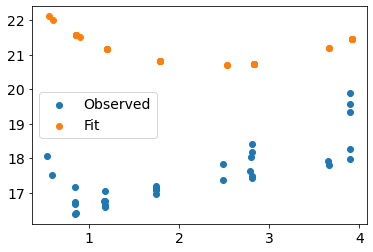

 Chi-Squared value for PIRO_2020 model used on 2021gno = 15.2722


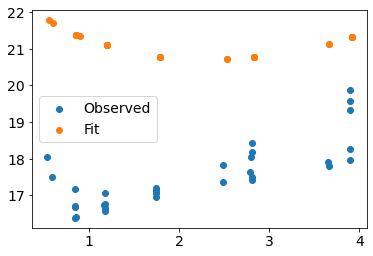

 Chi-Squared value for SW_BSG model used on 2021gno = 13.9153


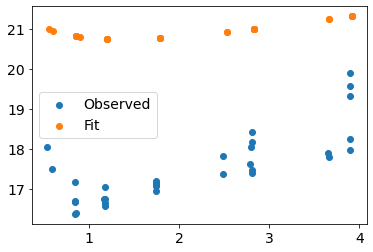

 Chi-Squared value for SW_RSG model used on 2021gno = 13.9363


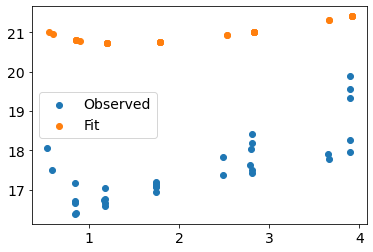

In [32]:
mods = ['PIRO_2015', 'PIRO_2020', 'SW_BSG', 'SW_RSG']
for m in mods:
    dof = 4
    red_data = pd.read_csv(f'{chi_fold}/reduced_data.csv')
    mags = pd.read_csv(f'{chi_fold}/sn{chi_fold} + {m}.txt', delimiter=',').iloc[:, :2]
    mags.columns = ['MAG', 'TIME']
    fitl = []
    fit_times = []
    for val in red_data['MJD_S']:
        closest_val = mags.iloc[np.searchsorted(np.array(mags['TIME']), val, 'left')] # closest mag-time pair for read in time
        fit_times.append(closest_val['TIME']) 
        fit_mag = closest_val['MAG']
        fitl.append(fit_mag)
    
    obs = np.array(red_data['RMAG'])
    if '2015' in m:
        dof = 3
        
        
    rchi = sum((obs - fitl)**2)/(len(fitl) - min(dof, 4))
    chis.append(np.round(rchi, 3))
    
    print(f' Chi-Squared value for {m} model used on {chi_fold} = {np.round(rchi, 4)}')
    plt.scatter(red_data['MJD_S'], obs, label='Observed')
    plt.scatter(fit_times, fitl, label='Fit')
    plt.legend();
    plt.show();

In [22]:
red_data

,Unnamed: 0,MJD,MAG,MAGERR,FLT,Vega,RMAG,MJD_S
0,0,59293.540000,16.658862,0.041000,W2,0.0,16.381894,0.840000
1,1,59293.880000,16.928862,0.042000,W2,0.0,16.651894,1.180000
2,2,59294.440000,17.480862,0.044000,W2,0.0,17.203894,1.740000
3,3,59295.510000,18.697862,0.058000,W2,0.0,18.420894,2.810000
4,4,59296.600000,19.845862,0.112000,W2,0.0,19.568894,3.900000
5,14,59296.600000,20.159892,0.165000,M2,0.0,19.884730,3.900000
6,12,59294.440000,17.340892,0.045000,M2,0.0,17.065730,1.740000
7,13,59295.510000,18.447892,0.064000,M2,0.0,18.172730,2.810000
8,10,59293.550000,16.682892,0.045000,M2,0.0,16.407730,0.850000
9,11,59293.880000,16.858892,0.043000,M2,0.0,16.583730,1.180000


In [26]:
ugh2, ugh

({'2011fu': '*',
  '2019dge': '*',
  '2021gno': '+',
  '2021inl': '+',
  'iPTF16hgs': '+',
  '2020bvc': 'x'},
 {'2011fu': 'IIb',
  '2019dge': 'IIb',
  '2021gno': 'Ca-Rich',
  '2021inl': 'Ca-Rich',
  'iPTF16hgs': 'Ca-Rich',
  '2020bvc': 'Ibc'})

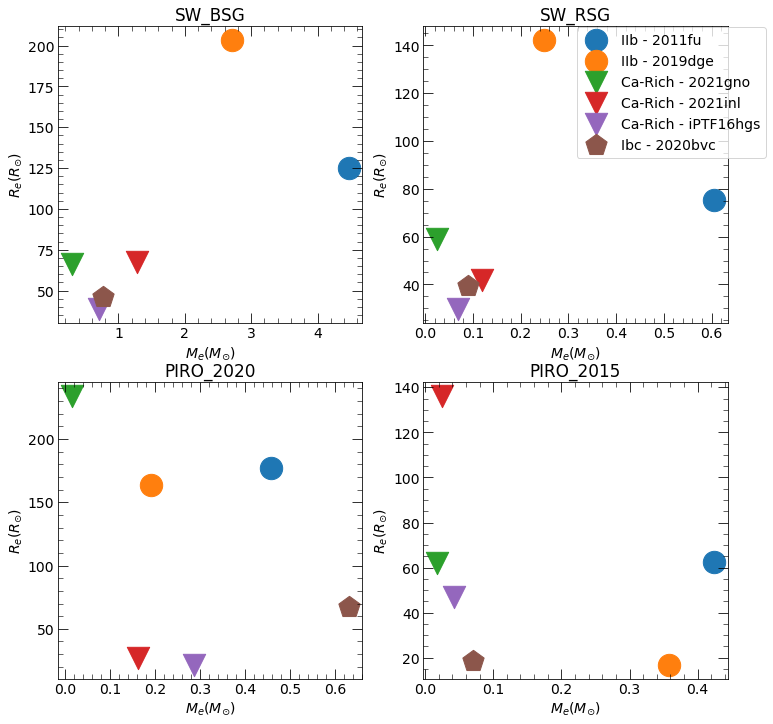

In [55]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
num=0
for i in range(2):
    for j in range(2):
        for obj in objects:
            fold = obj
            filename=filenames[num]
            dfs = [pd.read_csv(f'{fold}/{filename}', index_col=0) for filename in filenames]
            final = dfs[0].join(dfs[1:])
            name = filename[:-12]
            col = final[f'{name} value']
            axs[i][j].scatter(col[1], col[0], s=500,marker =ugh2[obj], label=f'{ugh[obj]} - {fold}')
            axs[i][j].set_title(name)
            axs[i][j].set_xlabel('$ M_e (M_{\odot}) $')
            axs[i][j].set_ylabel('$ R_e (R_{\odot}) $')
            axs[i][j].minorticks_on()
            axs[i][j].tick_params(labelsize=14)
            axs[i][j].tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
            axs[i][j].tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
            axs[i][j].tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

        num+=1
plt.legend(bbox_to_anchor=(1.15, 2.22))
plt.savefig("thesis_plot_all_params.png", dpi=300, facecolor='white')

In [53]:
#for obj in objects:
filenames = res_list
fold = obj
dfs = [pd.read_csv(f'{fold}/{filename}', index_col=0) for filename in filenames]
final = dfs[0].join(dfs[1:])
final.index = f'{fold} '+final.index
final

,SW_BSG value,SW_BSG error,SW_RSG value,SW_RSG error,PIRO_2020 value,PIRO_2020 error,PIRO_2015 value,PIRO_2015 error
iPTF16hgs Re (R_sun),38.557486,19.917821,29.577319,16.990376,21.310575,6.486065e+01,47.008951,7.706522
iPTF16hgs Me (M_sun),0.708017,0.151784,0.067705,0.014548,0.286246,1.594491e+06,0.042381,0.016587
iPTF16hgs ve (1e9 cm/s),1.096780,0.140740,0.929343,0.164126,1.267077,1.008295e+06,NaN,NaN
iPTF16hgs Off (days),1.000000,0.576916,1.000000,0.612949,0.500000,4.242097e+00,0.000100,0.671794


In [31]:
axs.shape

(2, 2)

,2019dge Re (R_sun),2019dge Me (M_sun),2019dge ve (1e9 cm/s),2019dge Off (days)
SW_BSG value,203.604317,2.711277,0.505067,1.800637e-01
SW_BSG error,15.919668,0.304428,0.018044,2.089003e-02
SW_RSG value,142.359152,0.249800,0.528540,1.519311e-01
SW_RSG error,11.312995,0.021690,0.013068,2.460654e-02
PIRO_2020 value,163.557457,0.191484,0.820331,7.944142e-14
PIRO_2020 error,32.423665,0.021915,0.059916,1.528039e-01
PIRO_2015 value,16.732918,0.358356,NaN,1.638717e-16
PIRO_2015 error,0.633815,0.030380,NaN,1.028735e-01


#### What does pysynphot do?

In [12]:
import pysynphot as S

In [19]:
S.ObsBandpass(f'bessell,H')

In [54]:
test = S.BlackBody(temperature=25291)

In [55]:
test.convert('flam')

In [56]:
test.wave

array([  500.        ,   500.19760122,   500.39528054, ...,
       25969.1985582 , 25979.46164894, 25989.72879567])

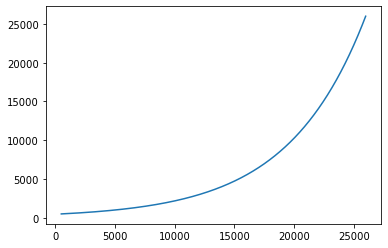

In [57]:
plt.plot(np.linspace(min(test.wave), max(test.wave), len(test.wave)), test.wave);